# TimeSeries Project (e-commerce dataset)

Problems encountered in dataset:
- Columns separated with character (')
- Float separated with comma 
- Totale column with negative values

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import dataset and formatting types

In [97]:
df = pd.read_csv('.\data\serie-storiche-ecommerce.csv', quotechar="'", parse_dates=["data"])
df["totale"] = df["totale"].apply(lambda x : (x.replace(",", ".")))
df["totale"] = df["totale"].astype(float)
df.sort_values('data', inplace=True)
df.head()

,data,totale,settore
0,2013-02-01,815.97,Calcio
1,2013-02-21,4775.75,Fitness
2,2013-04-01,4775.75,Fitness
3,2013-04-06,1962.15,Casual
4,2013-07-09,1809.87,Basket


In [98]:
### descriptive analysis on total column
df["totale"].describe()

count     25261.000000
mean       7886.239314
std       13273.856514
min       -2159.180000
25%        1335.300000
50%        3948.860000
75%       10209.730000
max      516104.930000
Name: totale, dtype: float64

In [99]:
df.isnull().sum()

data       0
totale     0
settore    0
dtype: int64

In [100]:
df = df[df["totale"]>0]

### Data exploration

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227 entries, 0 to 25260
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     25227 non-null  datetime64[ns]
 1   totale   25227 non-null  float64       
 2   settore  25227 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 788.3+ KB


In [102]:
### descriptive analysis on total column
df["totale"].describe()

count     25227.000000
mean       7896.953680
std       13279.580998
min           0.270000
25%        1337.210000
50%        3966.870000
75%       10224.470000
max      516104.930000
Name: totale, dtype: float64

(15497.0, 19357.0)

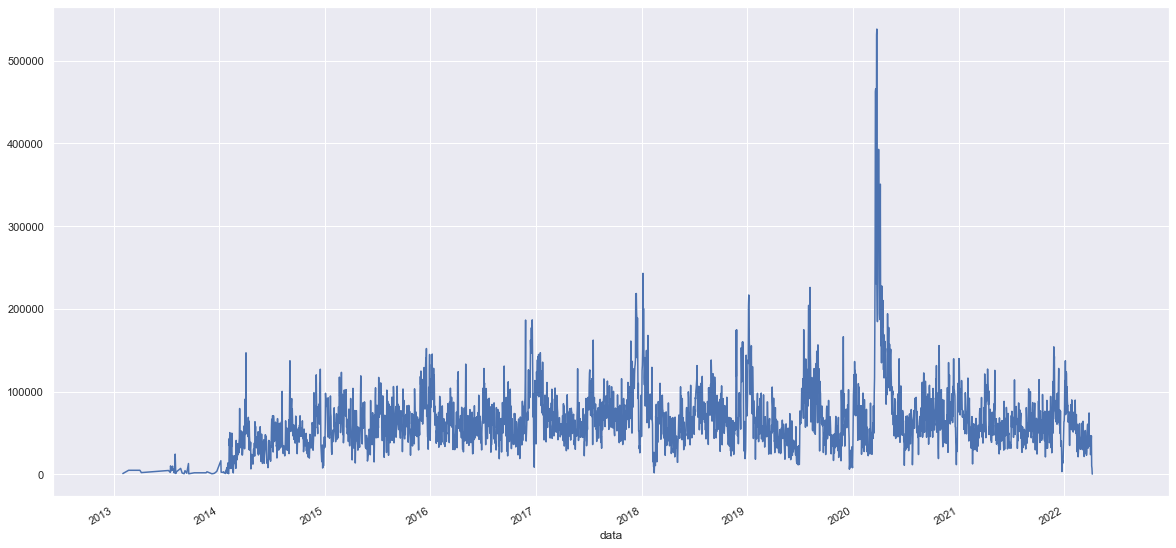

In [103]:
### Group by per data to sum total earnings
plt.figure(figsize=(20,10))
df.groupby(by="data", sort=True)["totale"].sum().plot()
plt.xlim(left='2012-06-06', right='2022-12-31')

(509.0, 635.0)

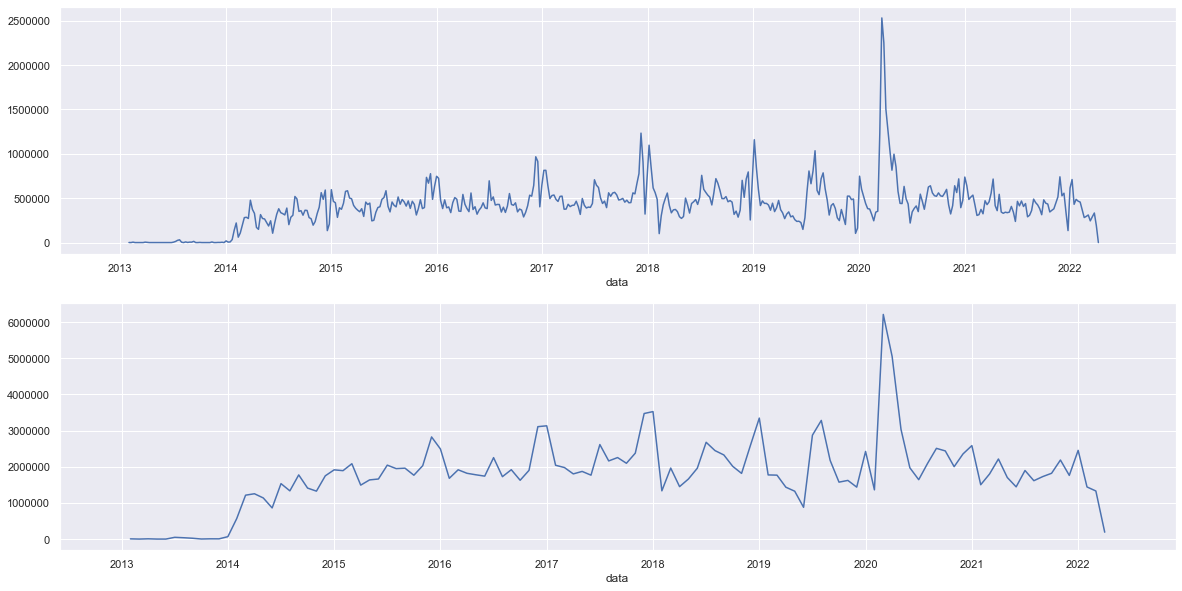

In [113]:
### Group by per data to sum total earnings (1 week and 1 month timeslice)
plt.figure(figsize=(20,10))

# 1 week sum
plt.subplot(2, 1, 1)
df.groupby(pd.Grouper(key='data', freq='7d'))['totale'].sum().plot()
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(left='2012-06-06', right='2022-12-31')

# 1 month sum
plt.subplot(2, 1, 2)
df.groupby(pd.Grouper(key='data', freq='1m'))['totale'].sum().plot()
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(left='2012-06-06', right='2022-12-31')

In [114]:
df['anno'] = [d.year for d in df['data']]
df['mese'] = [d.month for d in df['data']]

df_mese = pd.DataFrame(df.groupby(by=['anno', 'mese'])['totale'].sum()).reset_index()
df_mese = df_mese.pivot(index="mese", columns="anno", values="totale")
df_mese

anno,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
mese,,,,,,,,,,
1,NaN,66380.01,1915177.61,2492485.78,3133726.20,3526956.39,3347046.05,2424516.86,2585867.27,2454433.29
2,5591.72,566257.25,1892537.92,1680742.13,2041977.05,1334476.49,1774696.94,1361681.86,1502986.49,1441821.40
3,NaN,1214314.55,2084504.85,1916824.85,1979101.54,1964463.64,1768370.30,6214671.52,1801554.92,1330306.83
4,6737.90,1253832.30,1492607.00,1819879.86,1802996.39,1450739.45,1434904.75,5049599.36,2215748.88,190323.75
5,NaN,1137443.94,1636828.81,1778585.45,1871584.58,1661925.87,1324186.22,3034773.38,1703208.33,NaN
6,NaN,861426.76,1661795.96,1741072.59,1768156.51,1959720.63,878599.93,1972040.15,1444479.47,NaN
7,48439.07,1533765.47,2045291.58,2253249.19,2614772.30,2677628.83,2873786.07,1643029.44,1897045.85,NaN
8,36929.65,1334046.81,1949441.28,1726441.87,2161623.82,2447752.91,3282396.14,2093562.90,1614815.44,NaN
9,23031.93,1774889.96,1961328.90,1919045.42,2255164.99,2327098.65,2176619.92,2509867.98,1728323.79,NaN


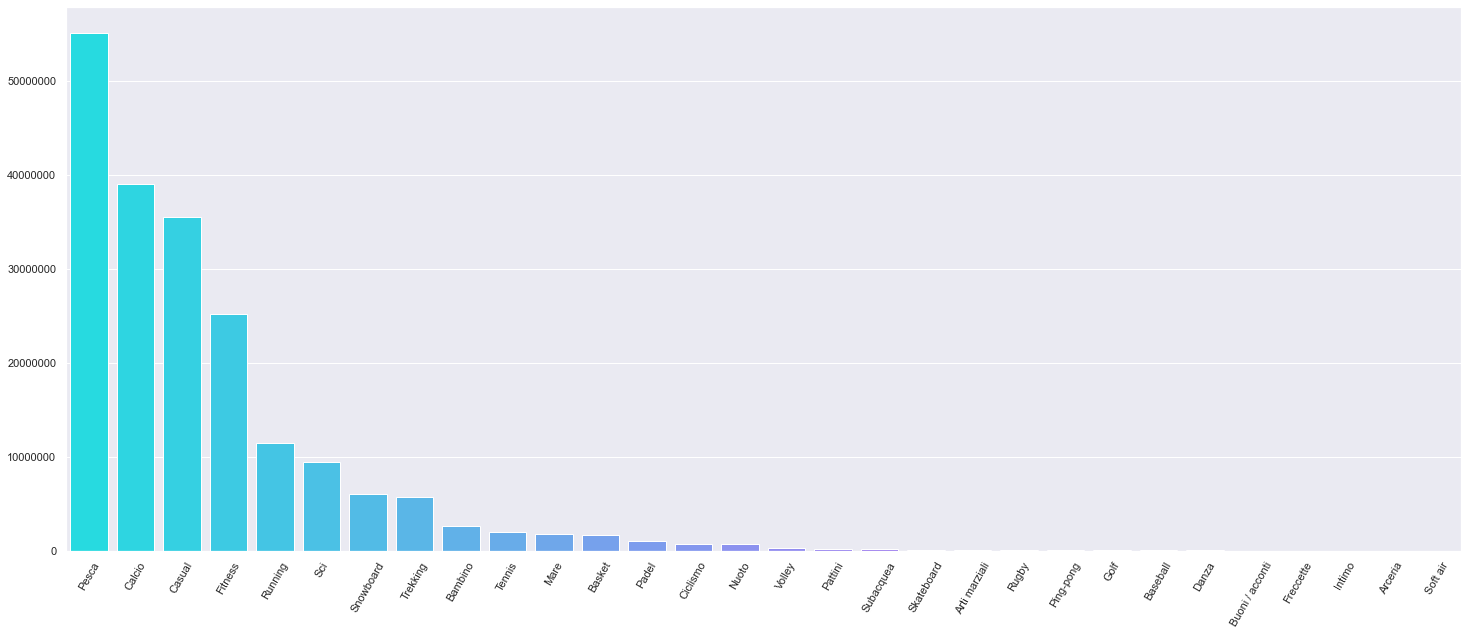

In [107]:
### Group by per category and sum up
df_groupby_settore = df.groupby(by=["settore"], sort=True)["totale"].sum().sort_values(ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
sns.barplot(x=list(df_groupby_settore.index), y=list(df_groupby_settore.values), palette="cool")
plt.ticklabel_format(style='plain', axis='y')


<AxesSubplot:xlabel='data'>

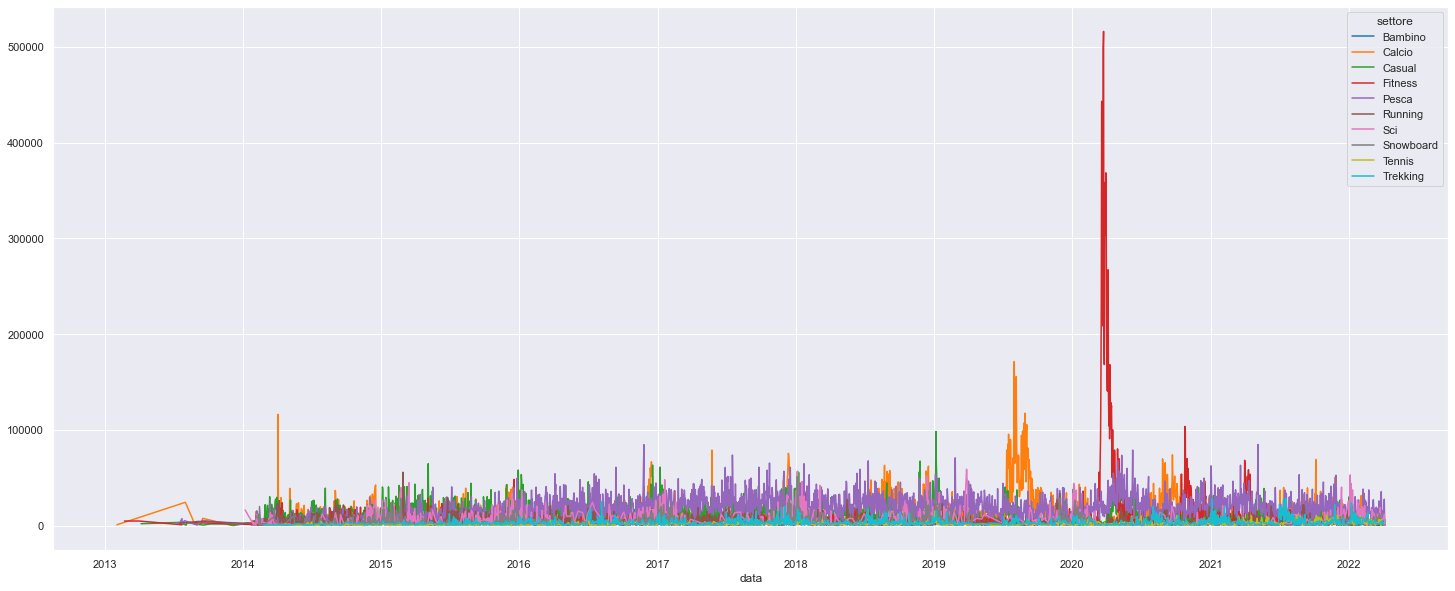

In [108]:
### time series group by higher sectors in total 
list_high_number_total = df_groupby_settore.index[0:10]
df_pivot_settore_and_data = (df.query("settore in @list_high_number_total")).pivot(index="data", columns="settore", values="totale")
plt.figure(figsize=(25,10))
sns.lineplot(data=df_pivot_settore_and_data, dashes=False, palette="tab10")

In [109]:
df_pivot_settore_and_data.describe()

settore,Bambino,Calcio,Casual,Fitness,Pesca,Running,Sci,Snowboard,Tennis,Trekking
count,1250.000000,2956.000000,2900.000000,2834.000000,2978.000000,2238.000000,1209.000000,1372.000000,972.000000,1514.000000
mean,2083.043672,13215.077493,12231.144103,8887.481136,18494.435480,5115.171332,7842.052672,4368.104964,2039.352294,3764.138137
std,2172.618008,13910.280138,9167.590532,27940.749429,11543.885015,4248.157510,8391.974503,5006.850072,2054.405058,3661.227758
min,81.870000,106.430000,54.580000,45.440000,36.840000,0.270000,2.730000,95.520000,36.840000,121.440000
25%,762.210000,5171.797500,5644.460000,2341.620000,10070.490000,2292.157500,1760.210000,1134.170000,614.030000,1335.300000
50%,1361.770000,9407.970000,10253.260000,4328.330000,16851.300000,3929.760000,5387.050000,2469.065000,1397.930000,2524.870000
75%,2676.467500,15947.525000,16424.757500,7727.827500,25013.057500,6854.840000,10902.360000,5681.095000,2863.402500,4947.202500
max,25858.090000,171365.370000,98255.460000,516104.930000,84700.250000,55733.000000,58780.480000,50980.720000,15268.760000,28574.540000


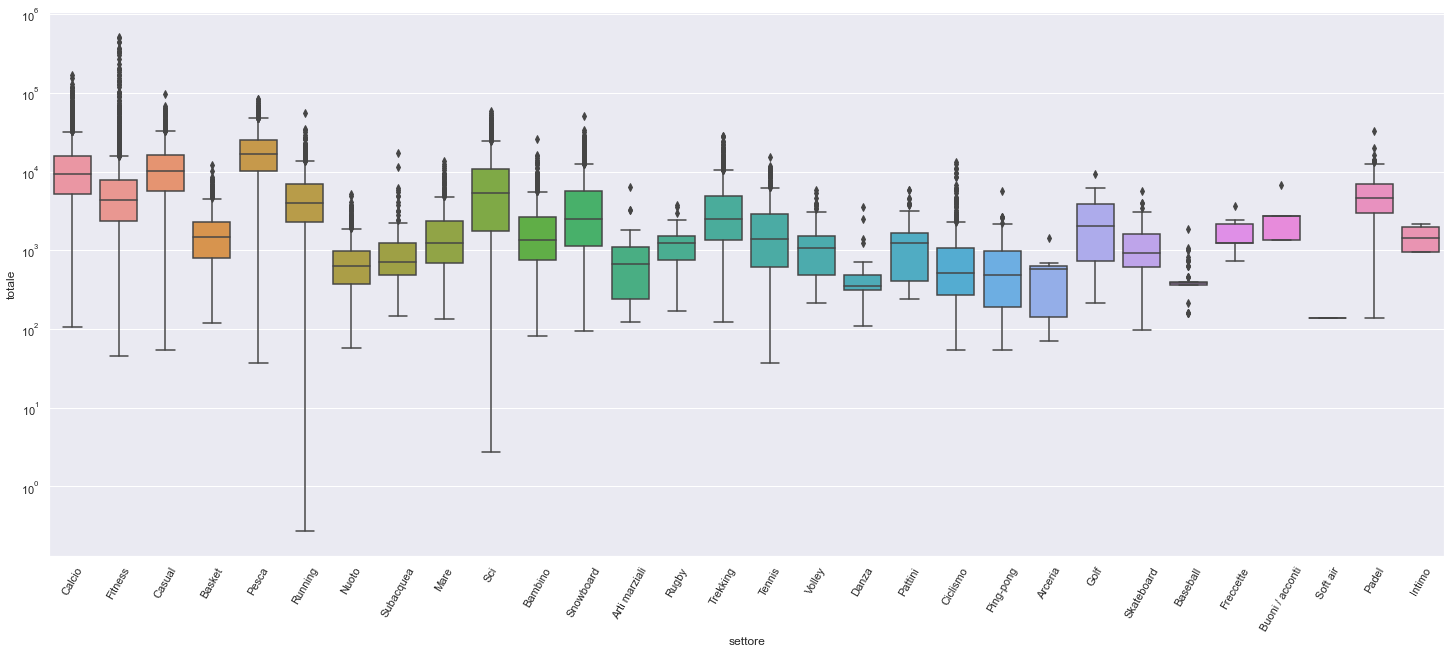

In [110]:
### boxplot to see correlation between cost spent and category
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
plot = sns.boxplot(data=df, x="settore", y="totale")
plot.set_yscale("log")

### Time series modeling